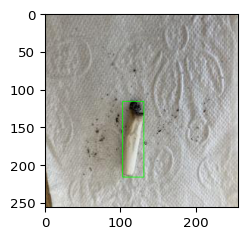

In [21]:
import imageio
import imgaug as ia
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
from imgaug import augmenters as iaa

path_to_imgs = "data/test/images/"
# coco json format: [x,y,width,height]

img_path = "data/test/images/cigarret_jpg.rf.727af4957c8a954d3a692c77da2aae62.jpg"

with open(img_path.replace('.jpg','.txt').replace('images', 'labels'), 'r') as f:
    label = f.read()
    f.close()

image = imageio.imread("data/test/images/cigarret_jpg.rf.727af4957c8a954d3a692c77da2aae62.jpg")
height, width, _ = image.shape

id, x1, y1, w, h = label.split(' ')
x1 = float(x1)
y1 = float(y1)
w = float(w)
h = float(h)
def yolobbox2bbox(x,y,w,h):
    x1, y1 = x-w/2, y-h/2
    x2, y2 = x+w/2, y+h/2
    return x1, y1, x2, y2

x1, y1, x2, y2 = yolobbox2bbox(x1,y1,w,h)
x1 = x1*width
x2 = x2*width
y1 = y1*height
y2 = y2*height


bb = BoundingBoxesOnImage([
    BoundingBox(x1=x1, x2=x2, y1=y1, y2=y2)
], shape=image.shape)

#ia.imshow(bb.draw_on_image(image, size=2))
image_aug, bbs_aug = iaa.Affine(rotate=90)(image=image, bounding_boxes=bb)0.0
ia.imshow(bbs_aug.draw_on_image(image_aug))

In [23]:
# Convert Pascal_Voc bb to Yolo
def pascal_voc_to_yolo(x1, y1, x2, y2, image_w, image_h):
    return [((x2 + x1)/(2*image_w)), ((y2 + y1)//(2*image_h)), (x2 - x1)/image_w, (y2 - y1)/image_h]

pascal_voc_to_yolo(x1, y1, x2, y2,width, height)

[0.6484375, 0.0, 0.392578125, 0.111328125]

In [24]:
label

'0 0.6484375 0.546875 0.392578125 0.111328125'

In [10]:
iaa.flip.HorizontalFlip(image)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()